# Image Transfer - inspect trained model

In [1]:
import os
from glob import glob
import numpy as np
import scipy.misc as sm
import matplotlib.pyplot as plt
import tensorflow as tf
import libs.network.BeautyGAN as model
import libs.configs.config
import datasets.datapipe as datapipe

FLAGS = tf.app.flags.FLAGS
os.environ['CUDA_VISIBLE_DEVICES'] = ''

/home/tj/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
base_dir = os.path.join(FLAGS.dataset_dir, FLAGS.dataset_name, 'images')
test_A_files = os.listdir(os.path.join(base_dir, 'testA'))
test_B_files = os.listdir(os.path.join(base_dir, 'testB'))
np.random.shuffle(test_A_files)
np.random.shuffle(test_B_files)
print(len(test_A_files), len(test_B_files), test_A_files[0], test_B_files[0])

inputA = tf.placeholder(tf.float32, shape=[None, None, 3], name='inputA')
inputB = tf.placeholder(tf.float32,shape=[None, None, 3], name='inputB')

imageA = datapipe._preprocess_for_test(inputA)
imageB = datapipe._preprocess_for_test(inputB)

""" build network """
net = model.BeautyGAN()
net.inference(imageA, imageB)

def convert_img(img):
    invert_img = (img + 1.) /2
    return invert_img


(100, 100, 'xfsy_0492.png', 'vRX616.png')


INFO:tensorflow:Restoring parameters from ./output/training/MakeUp_GAN.ckpt-295000
('ckpt_path', u'./output/training/MakeUp_GAN.ckpt-295000')
INFO:tensorflow:Restoring parameters from ./output/training/MakeUp_GAN.ckpt-295000


/home/tj/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:22: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/home/tj/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:23: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


((361, 361, 3), (361, 361, 3))
((361, 361, 3), (361, 361, 3))
((361, 361, 3), (361, 361, 3))
((361, 361, 3), (361, 361, 3))
((361, 361, 3), (361, 361, 3))


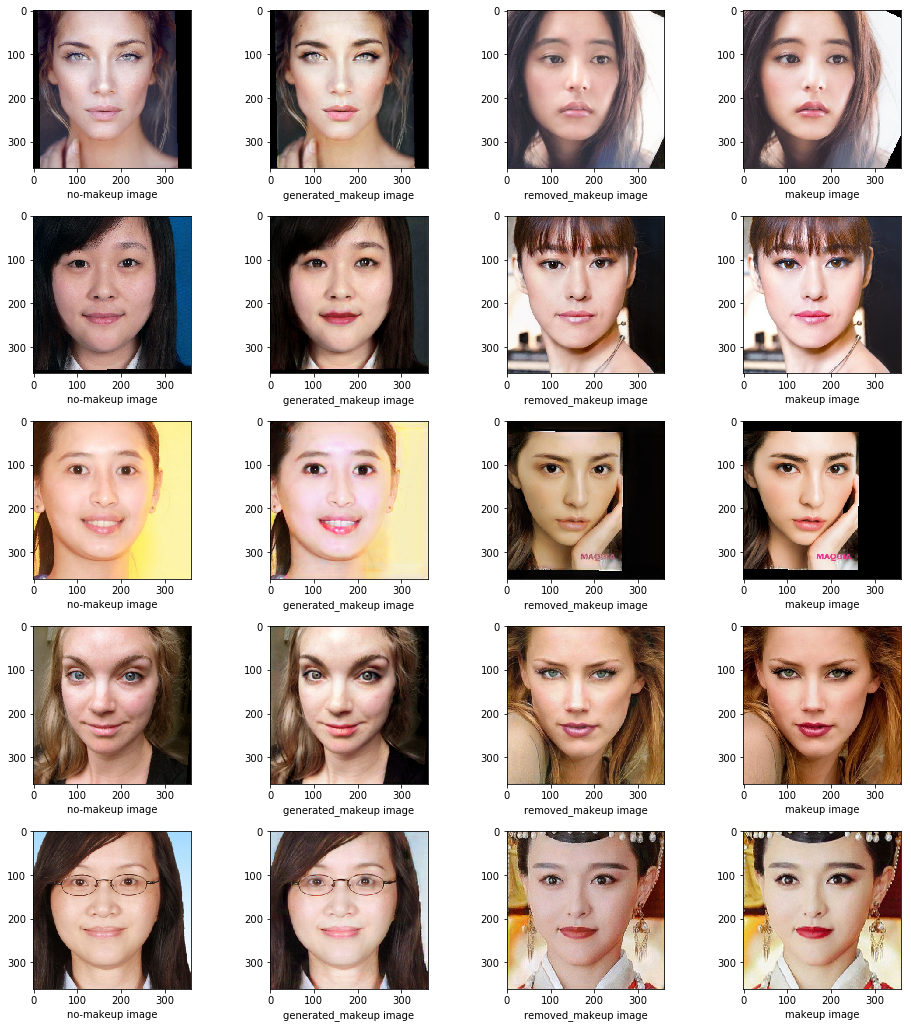

In [3]:
saver = tf.train.Saver()
init_op = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer())

with tf.Session() as sess:
    sess.run(init_op)
    ckpt = tf.train.get_checkpoint_state(FLAGS.last_checkpoint_model)
    """ resotre checkpoint of Backbone network """
    if ckpt is not None:
        ckpt_path = tf.train.latest_checkpoint(FLAGS.last_checkpoint_model)
        # ckpt_path = FLAGS.checkpoint_model
        saver.restore(sess, ckpt_path)
    else:
        ckpt_path = FLAGS.checkpoint_model
        saver.restore(sess, ckpt_path)
    print('ckpt_path', ckpt_path)
        
    saver.restore(sess, ckpt_path)

    rows = 5
    fig, axes = plt.subplots(rows, 4, figsize=(14, 18))
    for i in range(rows):
        dataA = sm.imread(base_dir+'/testA/'+test_A_files[i])
        dataB = sm.imread(base_dir+'/testB/'+test_B_files[i])
        print(dataA.shape, dataB.shape)
        feed_dict={inputA : dataA, inputB : dataB}
        fake_BA, fake_AB = sess.run([net.fake_ba, net.fake_ab], feed_dict=feed_dict)
    
        axes[i, 0].imshow(dataA)
        axes[i, 0].set_xlabel("no-makeup image")

        axes[i, 1].imshow(convert_img(fake_AB[0]))
        axes[i, 1].set_xlabel("generated_makeup image")

        axes[i, 2].imshow(convert_img(fake_BA[0]))
        axes[i, 2].set_xlabel("removed_makeup image")

        axes[i, 3].imshow(dataB)
        axes[i, 3].set_xlabel("makeup image")
    
    
    plt.subplots_adjust(left=0, wspace=0.2, hspace=0.3)
    plt.show()
    sess.close()
